# 作业3

### 第1题：Numpy 练习

以下运算都可以调用相应的函数而避免使用显式循环。

(a) 生成1000个服从 (0, 1) 间均匀分布的随机数，赋值给变量 `x`，并打印其最后10个元素。

In [19]:
# 此处插入代码
import numpy as np
x = np.random.uniform(low=0, high=1, size=1000)
print(x[:10])


[0.77269798 0.46711506 0.01994883 0.92344075 0.17914099 0.21944559
 0.37163092 0.18234995 0.60400082 0.50558542]


(b) 创建向量 `y`，令其在数学上等于 $y=-\log(x)$，其中 $\log$ 为自然对数，并打印其前10个元素。查找在 Python 中绘制图形的方法，绘制 `y` 的直方图。

[0.25786702 0.76117967 3.91458492 0.07964864 1.71958214 1.51665097
 0.98985407 1.70182761 0.50417973 0.68203827]


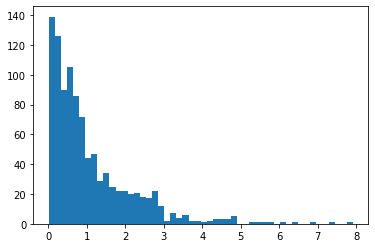

In [20]:
# 此处插入代码
import matplotlib.pyplot as plt
y = -np.log(x)
print(y[:10])

plt.hist(y,bins=50)
plt.show()

(c) 猜测或证明 `y` 服从什么分布，并简要说明理由。

（此处输入文字）

$y\sim \exp (1)$，理由如下：

$$
P(Y\le y) = P(-log(X) \le y) = P(X \ge e^{-y}) =1 - P(X \le e^{-y}) = 1 - e^{-y}
$$

此即为$\exp(1)$的cdf.

(d) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat1`，元素**按行排列**。打印其前5行。

In [21]:
# 此处插入代码
print(y[:10])
mat1 = y.reshape(200,5)
print(mat1[:5,:])

[0.25786702 0.76117967 3.91458492 0.07964864 1.71958214 1.51665097
 0.98985407 1.70182761 0.50417973 0.68203827]
[[0.25786702 0.76117967 3.91458492 0.07964864 1.71958214]
 [1.51665097 0.98985407 1.70182761 0.50417973 0.68203827]
 [2.32927864 0.58185108 0.33232637 2.24803362 0.16244721]
 [2.48111568 0.4299504  2.21273463 1.60557553 0.66733936]
 [1.20487796 0.21345851 1.26299321 1.16591163 0.50131217]]


(e) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat2`，元素**按列排列**。打印其前5行。（提示：可以使用转置操作）

In [22]:
# 此处插入代码
mat2 = y.reshape(5,200).transpose()
print(mat2[:5,:])

[[0.25786702 0.3911871  0.48154084 0.9078292  2.71842716]
 [0.76117967 1.02486686 0.57373615 1.03970113 1.88697755]
 [3.91458492 0.14050638 0.24385171 0.55192573 0.28699096]
 [0.07964864 0.36819665 0.56228507 0.2267689  1.24324412]
 [1.71958214 1.53181704 0.74181728 2.29824538 0.10747041]]


(f) 计算 `mat1` 每一列的均值，得到一个长度为5的向量 `v`，将其打印出来。然后将 `mat1` 的每一列进行中心化（即减去各自的均值），赋给变量 `mat1_centered`。类似地，计算 `mat1_centered` 的列均值向量并打印出来。

In [23]:
# 此处插入代码
v = np.mean(mat1,axis = 0)
print(f"v:{v}")

mat1_centered = mat1 - v
mat1_centered_colmean = np.mean(mat1_centered,axis = 0)
print(f"mat1 centered column mean:{mat1_centered_colmean}\n")

v:[1.07346752 1.05557171 1.11622292 0.93546245 1.12880493]
mat1 centered column mean:[-5.45119505e-16  2.92543767e-16 -6.60582700e-17  5.97855099e-16
 -4.16333634e-17]



### 第2题：统计计算练习

(a) 生成一个 $10000\times 1000$ 的矩阵 `X`，每个元素服从标准正态分布。生成一个长度为 10000 的向量 `y`，每个元素服从均值为0、方差为2的正态分布。生成一个长度为 10000 的向量 `w`，每个元素服从 $(1,5)$ 上的均匀分布。

In [24]:
# 此处插入代码
X = np.random.normal(size=10000*1000).reshape(10000,1000)
y = np.random.normal(loc=0, scale=np.sqrt(2), size=10000)
w = np.random.uniform(low=1, high=5, size=10000)

(b) 使用恰当的方式计算 $\hat{y}=X(X^{T}WX)^{-1}X^{T}Wy$，其中 `W` 是以 `w` 为对角线的对角矩阵。

In [25]:
import time
t1 = time.time()


# 此处插入代码
W = np.diag(w)
X.dot(np.linalg.solve(X.transpose().dot(W.dot(X)),X.transpose().dot(W.dot(y))))

t2 = time.time()
print(f"running time: {t2 - t1} seconds.")

running time: 5.193655252456665 seconds.


### 第3题：PySpark RDD 练习

利用如下代码模拟生成一个 $100000\times 10$ 的矩阵，并写入文件 `sim_data.txt`。

In [26]:
import numpy as np
np.random.seed(123)
dat = np.random.uniform(size=(100000, 10))
np.savetxt("sim_data.txt", dat, fmt="%.6f", delimiter=",")

使用合适的命令以单机模式启动 PySpark，并使用4个 CPU 核心。

In [27]:
# 此处插入代码
import findspark
findspark.init("/Users/xinby/Library/Spark")

from pyspark.sql import SparkSession
# 本地模式
spark = SparkSession.builder.\
    master("local[4]").\
    appName("PySpark RDD").\
    getOrCreate()
sc = spark.sparkContext
sc.setLogLevel("ERROR")
print(spark)
print(sc)

<SparkContext master=local[4] appName=PySpark RDD>


利用 PySpark 读取文件并打印出前5行：

In [28]:
file = sc.textFile("sim_data.txt")

text = file.take(5)
print(*text,sep="\n")

0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118
0.343178,0.729050,0.438572,0.059678,0.398044,0.737995,0.182492,0.175452,0.531551,0.531828
0.634401,0.849432,0.724455,0.611024,0.722443,0.322959,0.361789,0.228263,0.293714,0.630976
0.092105,0.433701,0.430863,0.493685,0.425830,0.312261,0.426351,0.893389,0.944160,0.501837
0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895


利用 `map()` 函数，生成一个元素类型为 Numpy 向量的 RDD，其每一个元素对应原始文本数据的每一行。打印出该 RDD 的前5个元素。

In [29]:
# 此处插入代码
def txt_to_np (line):
    str_vec = line.split(",")
    return np.array(str_vec,dtype=float)
data = file.map(txt_to_np)

print(data.take(5))


[array([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106,
       0.980764, 0.68483 , 0.480932, 0.392118]), array([0.343178, 0.72905 , 0.438572, 0.059678, 0.398044, 0.737995,
       0.182492, 0.175452, 0.531551, 0.531828]), array([0.634401, 0.849432, 0.724455, 0.611024, 0.722443, 0.322959,
       0.361789, 0.228263, 0.293714, 0.630976]), array([0.092105, 0.433701, 0.430863, 0.493685, 0.42583 , 0.312261,
       0.426351, 0.893389, 0.94416 , 0.501837]), array([0.623953, 0.115618, 0.317285, 0.414826, 0.866309, 0.250455,
       0.483034, 0.98556 , 0.519485, 0.612895])]


利用 `map()` 和 `reduce()` 函数计算每一列的样本方差，并将结果打印出来。要求 `reduce()` 只能使用一次。

样本方差计算：$\frac{1}{n-1}(\sum_{i=1}^n x_i^2+n\bar x^2-2\bar x\sum_{i=1}^n x_i)$

In [36]:
# 此处插入代码
num,sum,sq_sum = data.map(lambda x: (1,x,x*x)).reduce(lambda x,y: (x[0]+y[0],x[1]+y[1],x[2]+y[2]))
mean = sum / num
sample_var = (sq_sum+num*mean*mean-2*mean*sum)/(num-1)
print(sample_var)


[0.08296877 0.08328241 0.0835851  0.08288007 0.08328285 0.0831696
 0.08332109 0.08297298 0.08334512 0.08343152]


将原始文件的 RDD 划为10个分区，然后利用 `mapPartitions()` 函数将每个分区转成一个 Numpy 矩阵，过滤掉空的矩阵，最后得到一个元素类型为 Numpy 矩阵的 RDD。然后打印出该 RDD 的元素个数。

In [31]:
# 此处插入代码
file_p10 = file.repartition(10)

def part_to_matr (iter):
    iter_arr = map(txt_to_np, iter)
    dat = list(iter_arr)

    if len(dat) < 1:
        mat = np.array([])
    else:
        mat = np.vstack(dat)
    yield mat

matdat_p10 = file_p10.mapPartitions(part_to_matr)
print(f"before filter:{matdat_p10.count()}")
matdat_p10_nonempt = matdat_p10.filter(lambda x: x.shape[0]>0)
print(f"after filter:{matdat_p10_nonempt.count()}")#??


before filter:10
after filter:10


利用上述 RDD 和 `map()`、`reduce()` 函数计算每一列的样本方差，并将结果打印出来。要求 `reduce()` 只能使用一次。

In [38]:
# 此处插入代码 

num_p10, sum_p10, sq_sum_p10 = matdat_p10_nonempt\
    .map(lambda x: (x.shape[0],np.sum(x,axis=0), np.sum(x*x, axis =0)))\
        .reduce(lambda x,y: (x[0]+y[0],x[1]+y[1],x[2]+y[2]))
# 其中map中lambda的第三个函数是相当于对矩阵求每个列的二范数的平方

mean_p10 = sum_p10 / num_p10
sample_var_p10 = (sq_sum_p10+num_p10*mean_p10*mean_p10-2*mean_p10*sum_p10)/(num_p10-1)
print(sample_var_p10)

[0.08296877 0.08328241 0.0835851  0.08288007 0.08328285 0.0831696
 0.08332109 0.08297298 0.08334512 0.08343152]
